In [2]:
#!pip install -U sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
      Successfully uninstalled sympy-1.11.1


In [3]:
import sympy as sp
sp.__version__

'1.12'

In [4]:
s=sp.symbols("s")
t=sp.symbols("t", real=True, positive=True)

In [5]:
A=sp.Matrix([[-1,0],[1,-2]])
A

Matrix([
[-1,  0],
[ 1, -2]])

In [6]:
P,D=A.diagonalize()
P,D

(Matrix([
 [0, 1],
 [1, 1]]),
 Matrix([
 [-2,  0],
 [ 0, -1]]))

In [7]:
P.inv()

Matrix([
[-1, 1],
[ 1, 0]])

Let's use initial conditions $y_1=2$, $y_2=1$. Note that with these initial conditions $dy_2/dt = 0$ when $t=0$.

In [8]:
y0 = sp.Matrix([2,1])

In [9]:
Y=P*sp.exp(D*t)*P.inv()*y0
Y

Matrix([
[            2*exp(-t)],
[2*exp(-t) - exp(-2*t)]])

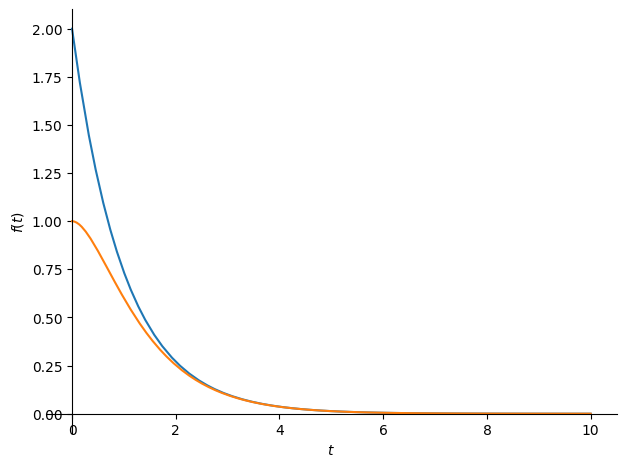

In [10]:
sp.plot(*[Y[i] for i in range(len(Y))],(t,0,10))

Let's solve the homogeneous problem again using the Laplace Transform with the same initial conditions.

In [11]:
Y = (s+3)/(s**2+3*s+2)
Y

(s + 3)/(s**2 + 3*s + 2)

In [12]:
Y.apart()

-1/(s + 2) + 2/(s + 1)

In [13]:
sp.inverse_laplace_transform(Y,s,t)

2*exp(-t) - exp(-2*t)

Let's now apply a pulse to the system starting at rest. (so make the initial contitions $y_2(0)=0$, and $dy_2/dt(0)=0$. We worked out the Laplace Transform of a pulse in the Activity 6 notebook.

In [14]:
X=(1-sp.exp(-s))/s
X

(1 - exp(-s))/s

Let's check that we really get a pulse. Yes!

In [15]:
x=sp.inverse_laplace_transform(X,s,t)
x

1 - Heaviside(t - 1)

In [16]:
Y=X/(s**2+3*s+2) # the Laplace Transform of the solution.
Y

(1 - exp(-s))/(s*(s**2 + 3*s + 2))

In [17]:
y2=sp.inverse_laplace_transform(Y,s,t)
y2

(-(exp(2*t) - 2*exp(t + 1) + exp(2))*Heaviside(t - 1) + exp(2*t) - 2*exp(t) + 1)*exp(-2*t)/2

In [18]:
y1=y2.diff(t)+2*y2
sp.simplify(y1)

(-(exp(2*t) - exp(t + 1))*Heaviside(t - 1) - (exp(2*t) - 2*exp(t + 1) + exp(2))*DiracDelta(t - 1)/2 + exp(2*t) - exp(t))*exp(-2*t)

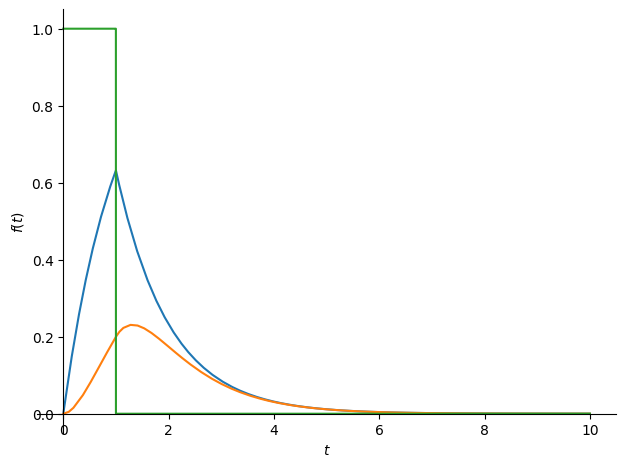

In [19]:
sp.plot(y1,y2,x,(t,0,10))

Just for fun, here's the "Activity 7" approach.

In [20]:
SMA = sp.diag(s,s) - A
SMA

Matrix([
[s + 1,     0],
[   -1, s + 2]])

In [21]:
X = sp.Matrix([(1-sp.exp(-s))/s,0])
X

Matrix([
[(1 - exp(-s))/s],
[              0]])

In [22]:
x = sp.inverse_laplace_transform(X,s,t)
x

Matrix([
[1 - Heaviside(t - 1)],
[                   0]])

In [23]:
Y = SMA.inv()*(X)
Y

Matrix([
[           (1 - exp(-s))/(s*(s + 1))],
[-(1 - exp(-s))/(s*(-s**2 - 3*s - 2))]])

In [24]:
Yt = sp.inverse_laplace_transform(Y,s,t)
Yt

Matrix([
[                                       (-(exp(t) - E)*Heaviside(t - 1) + exp(t) - 1)*exp(-t)],
[-((exp(2*t) - 2*exp(t + 1) + exp(2))*Heaviside(t - 1) - exp(2*t) + 2*exp(t) - 1)*exp(-2*t)/2]])

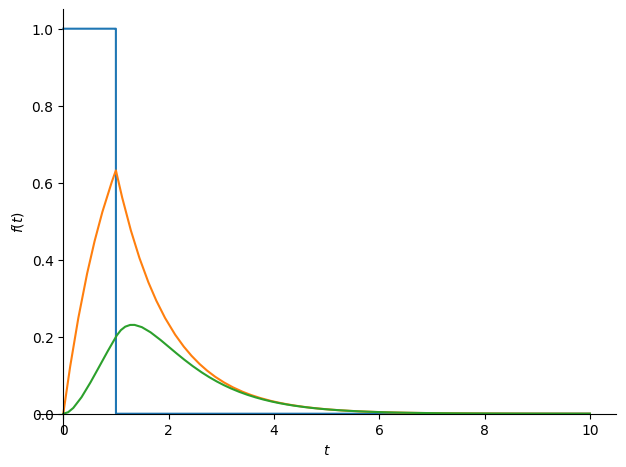

In [25]:
sp.plot(x[0],Yt[0],Yt[1],(t,0,10))